In [1]:
# import geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# countries data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

**Print the top 5 rows of world dataframe.**

In [3]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


**Remove continents which have only one country in dataframe.**


In [94]:
# Also 
# df1 = df[df['A'].map(df['A'].value_counts()) > 1]
# OR
# df1 = df[df.groupby("A")['A'].transform('size') > 1]

country_count = dict(world['continent'].value_counts())
world['country_count'] = world['continent']  # initiallizng collumn
world['country_count'] = world['country_count'].map(country_count)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country_count
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",7
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",51
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",51
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",18
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",18


In [29]:
my_filter = world[world['country_count'] < 2]
my_filter.index

Int64Index([23, 159], dtype='int64')

In [30]:
# remove these continents
world = world.drop(my_filter.index)

In [31]:
world[world['country_count'] < 2]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country_count


In [ ]:
res = world[~world['continent'].isin(counts[counts < 2].index)]

In [ ]:
# counts = world['continent'].value_counts()
# res = world[~world['continent'].isin(counts[counts < 2].index)]

**Create dataframe with top 3 most populated countries from each continent and store the result in dataframe with name 'world_filtered'.**


In [68]:

world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country_count
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",7
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",51
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",51
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",18
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",18


In [84]:
#top 3 countries 


world_filtered = world.groupby('continent').apply(lambda x: x.sort_values('pop_est', ascending =False).head(3)).reset_index(drop=True)


In [85]:
world_filtered.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country_count
0,190632261,Africa,Nigeria,NGA,1089000.0,"POLYGON ((2.69170 6.25882, 2.74906 7.87073, 2....",51
1,105350020,Africa,Ethiopia,ETH,174700.0,"POLYGON ((47.78942 8.00300, 44.96360 5.00162, ...",51
2,97041072,Africa,Egypt,EGY,1105000.0,"POLYGON ((36.86623 22.00000, 32.90000 22.00000...",51
3,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",47
4,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",47


**Print the 'world_filtered' dataframe.**

In [86]:
# world.iloc[18]

-----------------
## Part I: Create a choropleth map of world:

   - First using **Geopandas**
       - Note: Geopandas may not work well on your computers, especially on Windows computers, it is advised to use Google Collab for this assignment. 
   - Second using **Plotly**
       - Note: Plotly may not work well on Jupyter Labs, it is advised to use Jupyter Notebooks or Google Collab for the plotly portion. 


> #### Notes
> * the colors of countries from 'world_filtered' are based on population
> * other countries can stay white

### GeoPandas

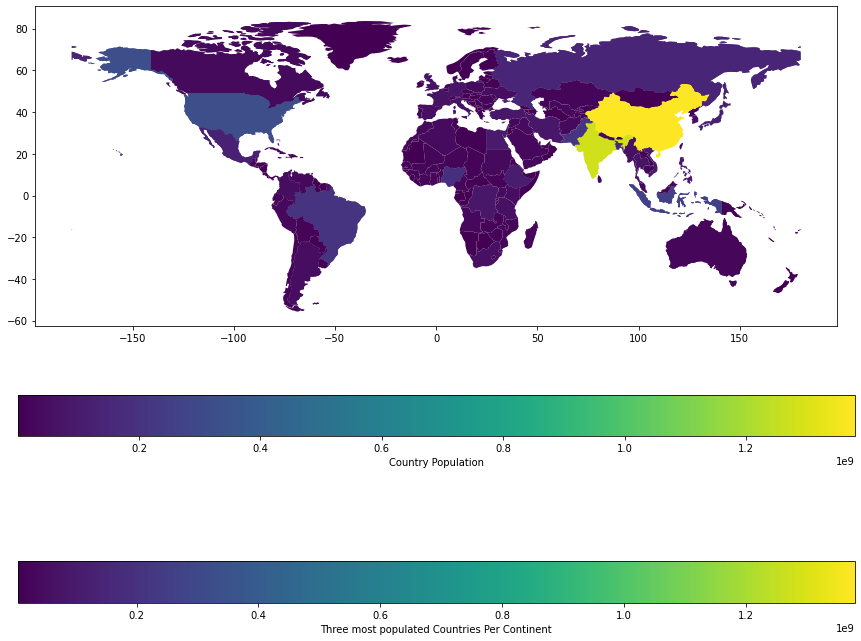

In [102]:
# create figure and axes


fig, ax = plt.subplots(figsize=(15,12))

# create map from world_filtered data-frame

world_filtered.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Three most populated Countries Per Continent",
                        'orientation': "horizontal"})


# add the rest of the countries
world.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Country Population",
                        'orientation': "horizontal"})

plt.show()

### Plotly

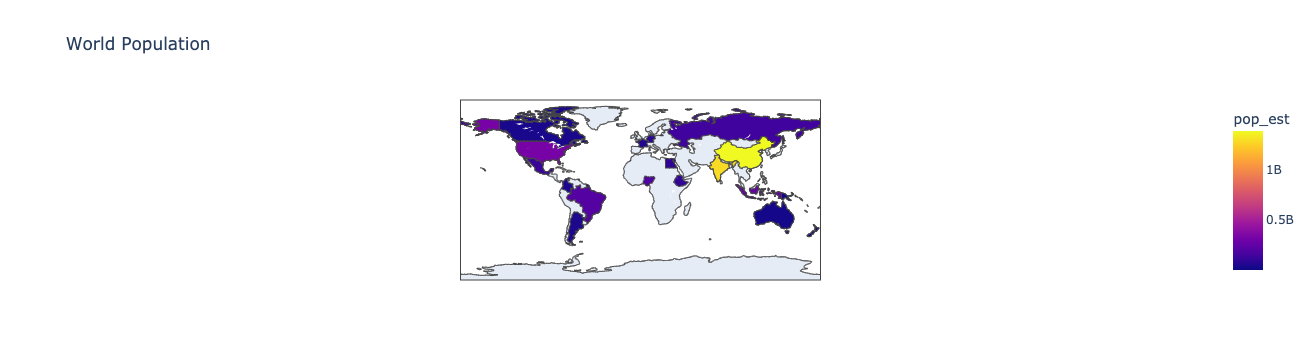

In [105]:
import plotly.express as px
fig =px.choropleth(world_filtered,
              locations='name',
              locationmode='country names', #can be ‘ISO-3’‘USA-states’‘country names’
              color='pop_est',
                   
#               projection='kavrayskiy7', #how the world looks
              scope='world', #‘world’, ‘usa’, ‘europe’, ‘asia’, ‘africa’, ‘north america’, or ‘south america’.
              title='World Population')

fig.show()

# projections types
'equirectangular', 'mercator', 'orthographic', 'natural earth', 'kavrayskiy7', 'miller', 'robinson', 'eckert4','azimuthal equal area', 
'azimuthal equidistant', 'conic equal area', 'conic conformal', 'conic equidistant', 'gnomonic', 
'stereographic', 'mollweide', 'hammer', 'transverse mercator', 'albers usa', 'winkeltripel', 'aitoff', or 'sinusoidal'

In [106]:
# import plotly.graph_objects as go

# import pandas as pd
# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

# fig = go.Figure(data=go.Choropleth(
#     locations=world_filtered['geometry'], # Spatial coordinates
#     z = df['total exports'].astype(float), # Data to be color-coded
#     locationmode = 'USA-states', # set of locations match entries in `locations`
#     colorscale = 'Reds',
#     colorbar_title = "Millions USD",
# ))

# fig.update_layout(
#     title_text = '2011 US Agriculture Exports by State',
#     geo_scope='usa', # limite map scope to USA
# )

# fig.show()

# # import plotly.graph_objects as go
# # import pandas as pd

# # # df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

# # fig = go.Figure(data=go.Choropleth(
# #     locations = world_filtered['geometry'],
# #     z = world_filtered['pop_est'],
# #     text = world_filtered['name'],
# #     colorscale = 'Blues',
# #     autocolorscale=False,
# #     reversescale=True,
# #     marker_line_color='darkgray',
# #     marker_line_width=0.5,
#     colorbar_tickprefix = '$',
#     colorbar_title = 'GDP<br>Billions US$',
# ))

# fig.update_layout(
#     title_text='Largest Country Populations',
#     geo=dict(
#         showframe=False,
#         showcoastlines=False,
#         projection_type='equirectangular'
#     ),
#     annotations = [dict(
#         x=0.55,
#         y=0.1,
#         xref='paper',
#         yref='paper',
# #         text='Source': 'naturalearth_lowres',
#         showarrow = False
#     )]
# )

# fig.show()

-----------
## Part II: More Geopandas

In Geopandas:

* add New York, Berlin, Paris, Toronto, Calgary, Tokyo to the map you have created before
    * to get geometry of these cities use the function, **gpd.tools.geocode**(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'])
    * if you do not have the geopy library instaled, install it with the following command **in the jupyter notebook cell** `!pip install geopy` 

In [143]:
!pip install geopy
!pip install geocoder

In [132]:
# cities.merge(city_list,  how='inner', on='name' )

# provider = arcgis


,name,geometry
0,Berlin,POINT (13.39960 52.52376)
1,Tokyo,POINT (139.74946 35.68696)
2,Paris,POINT (2.33139 48.86864)


In [134]:
import geopy
from geopandas.tools import geocode

x = geocode(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'], provider = 'arcgis')
x

,geometry,address
0,POINT (-74.00714 40.71455),New York
1,POINT (13.37691 52.51604),Berlin
2,POINT (2.34140 48.85717),"Paris, Île-de-France"
3,POINT (-79.38544 43.64869),"Toronto, Ontario"
4,POINT (-114.06301 51.04532),"Calgary, Alberta"
5,POINT (139.69172 35.68946),Tokyo


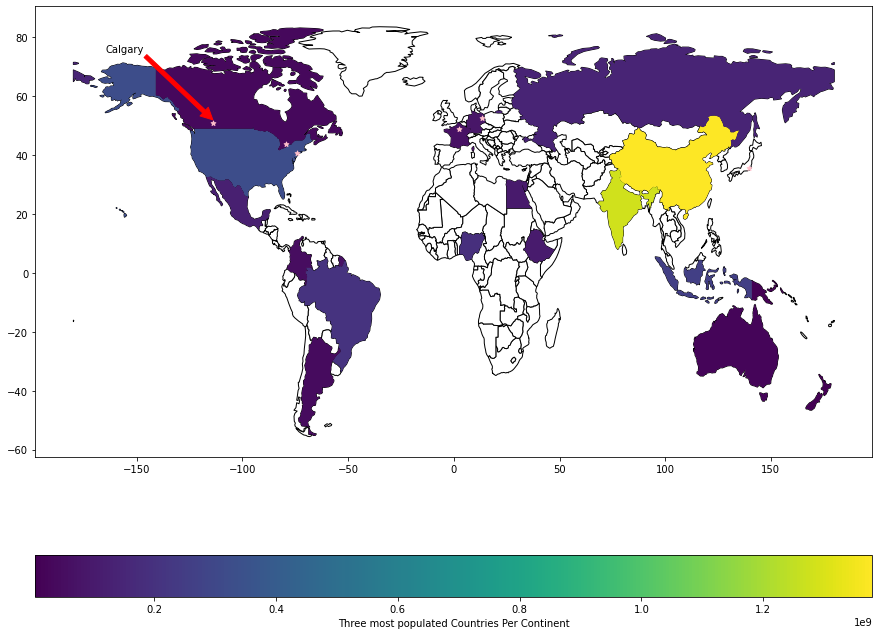

In [152]:

# create figure and axes

fig, ax = plt.subplots(figsize=(15,12))



# add the rest of the countries
world.plot(ax=ax, color='white', edgecolor='black')
# create map from world_filtered data-frame



world_filtered.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Three most populated Countries Per Continent",
                        'orientation': "horizontal"})


# add the rest of the countries
# world.plot(column='pop_est', ax=ax, legend=True,
#            legend_kwds={'label': "Country Population",
#                         'orientation': "horizontal"})



# # a layer of cities
x.plot(ax=ax ,marker='*', color='pink', markersize=25, label="address")

ax.annotate('Calgary', xy=(-114,52), xytext=(-165,75), arrowprops={'color':'red'})



plt.show()

